## Installing necessary packages

In [3]:
! pip install numpy
! pip install matplotlib
! pip install python-igraph

## Import libraries

In [4]:
import numpy as np
from igraph import *

# Produza redes scale free sintetizadas de acordo com o modelo BA. 

## Considere m novas ligações por nó introduzido.

### Calcule empiricamente as propriedades CC e APL, compare com os resultados obtidos para redes do mesmo tamanho , geradas pelo modelo de Poisson e pelo modelo WS. O que observa?

### Function to generate a graph with BA model given m

In [5]:
def generateGraphBA(m,n, start_from = None):
  g = None
  
  g = Graph.Barabasi(m=m,n=n)
  return g

In [55]:
def generateGraphPoisson(n,m):
  g = None

  g = Graph.Erdos_Renyi(n=n,m=m)
  return g

In [62]:
def generate_Watts_Strogatz(dim, size, nei, p):
  g = None

  g = Graph.Watts_Strogatz(dim=dim, size=size, nei=nei, p=p)
  return g

In [69]:
graphBA = generateGraphBA(m=2,n=50)
graphPoisson = generateGraphPoisson(n=50,m =50)
graphWS = generate_Watts_Strogatz(dim=1,size=50,nei=2, p=0.01)

In [64]:
def plot_graph(g, key= None):
  value = range(0,len(g.vs))
  if key :
    value = g.vs[key]
  color_dict = {0:'#B6D7A8',1:'#F9CB9C',2:'#FFE599',3:'#A4C2F4',4:'#A2C4C9'}
  g.vs["color"] = [(color_dict[0]) for index in range(0,len(g.vs))]
  g.vs["label"] =  value
  g.vs["size"] = 35
  layout = g.layout_kamada_kawai()
  return g,layout
  

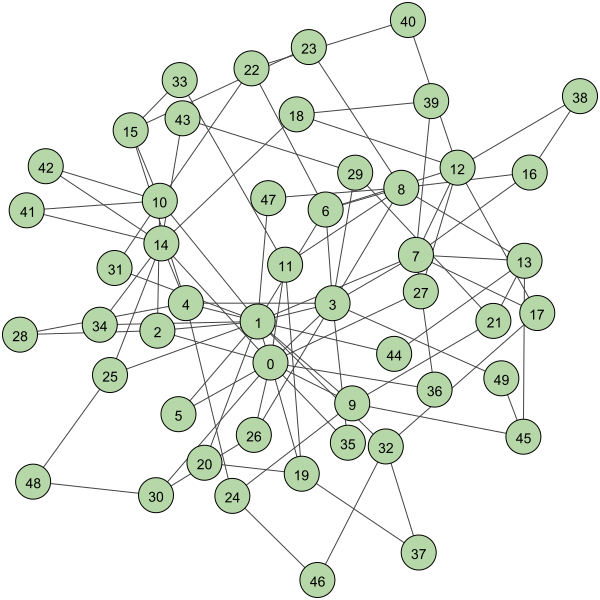

In [65]:
graph, layout = plot_graph(graphBA)
plot(graph, layout = layout)

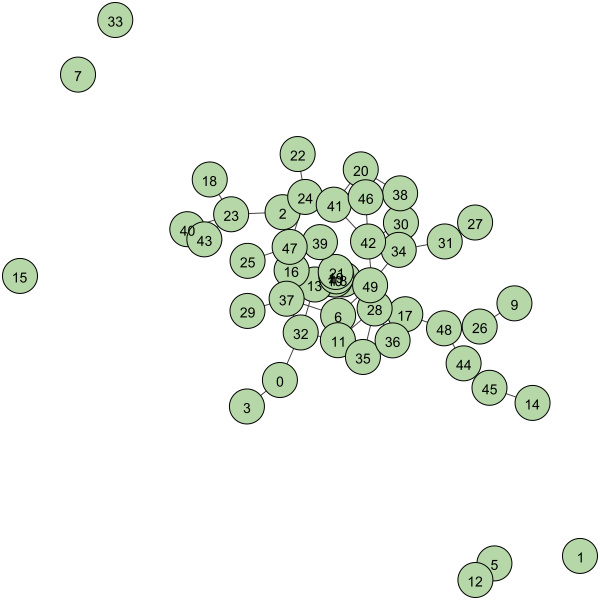

In [66]:
graph, layout = plot_graph(graphPoisson)
plot(graph, layout = layout)


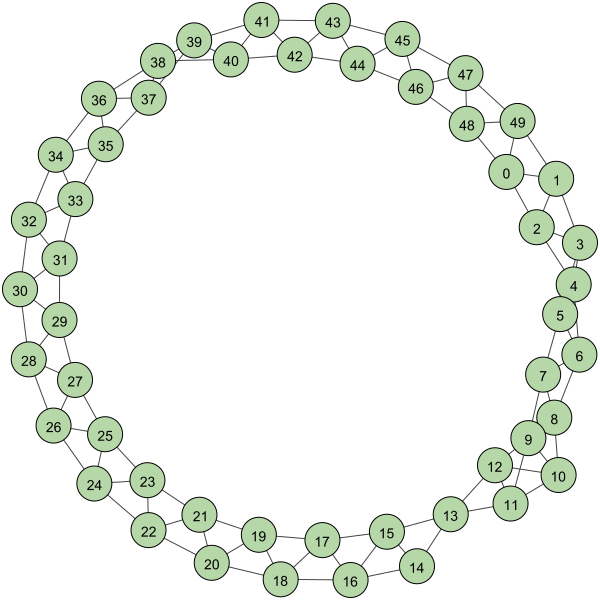

In [75]:
graph, layout = plot_graph(graphWS)
apl_ = graph.average_path_length()
plot(graph, layout = layout)

6.578775510204082
